In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diabetes = pd.read_csv("dataset/diabetes.csv")
#preview data
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#preview description
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes_data_copy = diabetes.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [6]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

In [7]:
X = diabetes_data_copy.drop(columns=['Outcome'])
y = diabetes_data_copy['Outcome']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
k = 31  # You can experiment with different values of k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7532467532467533
Confusion Matrix:
 [[83 16]
 [22 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81        99
           1       0.67      0.60      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [21]:
from sklearn.metrics import mean_squared_error

# Assuming 'y_actual' contains the actual target values and 'y_predicted' contains the predicted values
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.2532467532467532


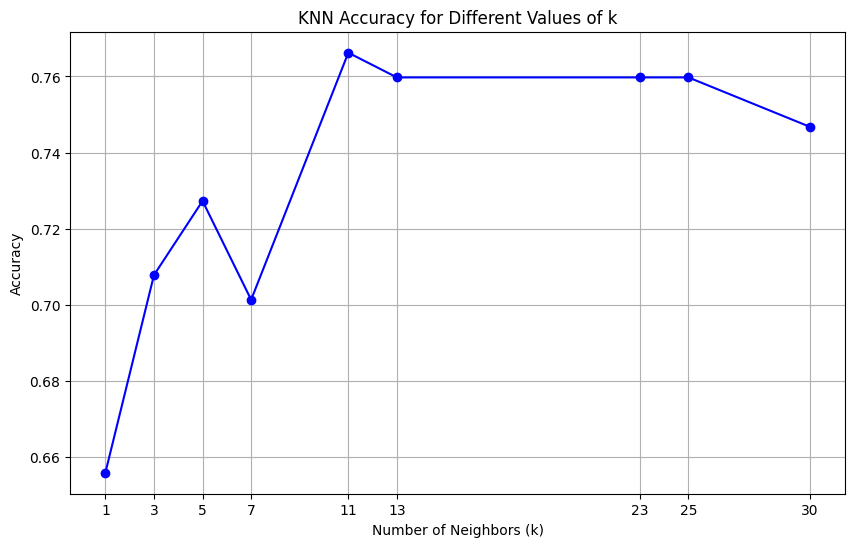

In [10]:
import matplotlib.pyplot as plt

# Values of k to test
k_values = [1, 3, 5, 7, 11, 13, 23, 25, 30]

# Lists to store accuracy values for each k
accuracy_values = []

# Loop through different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.show()

k : 1
accuracy : 0.66
Mean Squared Error (MSE): 0.34
k : 3
accuracy : 0.71
Mean Squared Error (MSE): 0.29
k : 5
accuracy : 0.73
Mean Squared Error (MSE): 0.27
k : 7
accuracy : 0.70
Mean Squared Error (MSE): 0.30
k : 11
accuracy : 0.77
Mean Squared Error (MSE): 0.23
k : 13
accuracy : 0.76
Mean Squared Error (MSE): 0.24
k : 23
accuracy : 0.76
Mean Squared Error (MSE): 0.24
k : 25
accuracy : 0.76
Mean Squared Error (MSE): 0.24
k : 30
accuracy : 0.75
Mean Squared Error (MSE): 0.25


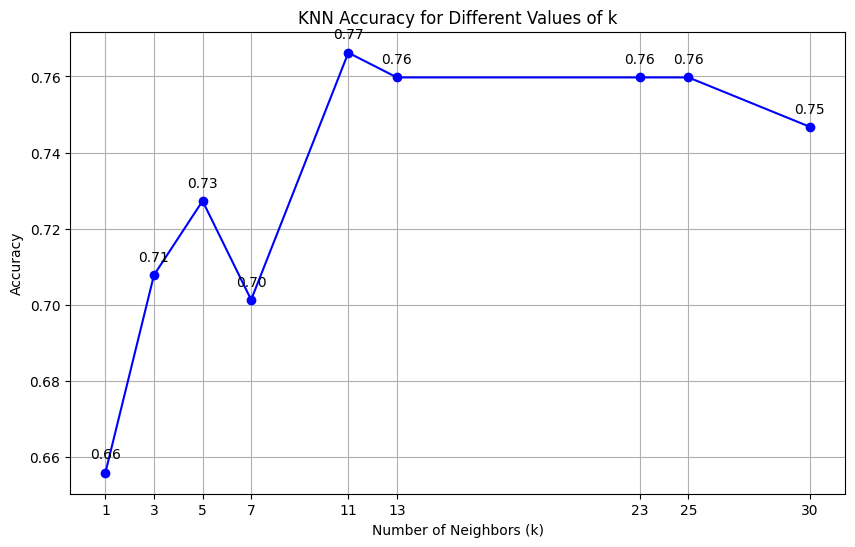

In [25]:
import matplotlib.pyplot as plt

# Values of k to test
k_values = [1, 3, 5, 7, 11, 13, 23, 25, 30]

# Lists to store accuracy values for each k
accuracy_values = []

x=100

# Loop through different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
#     x=x-accuracy
#     print(x)
    print(f'k : {k:}')
    print(f'accuracy : {accuracy:.2f}')
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error (MSE): {mse:.2f}')

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)

# Annotate the points with accuracy values
for i, acc in enumerate(accuracy_values):
    plt.annotate(f'{acc:.2f}', (k_values[i], accuracy_values[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()


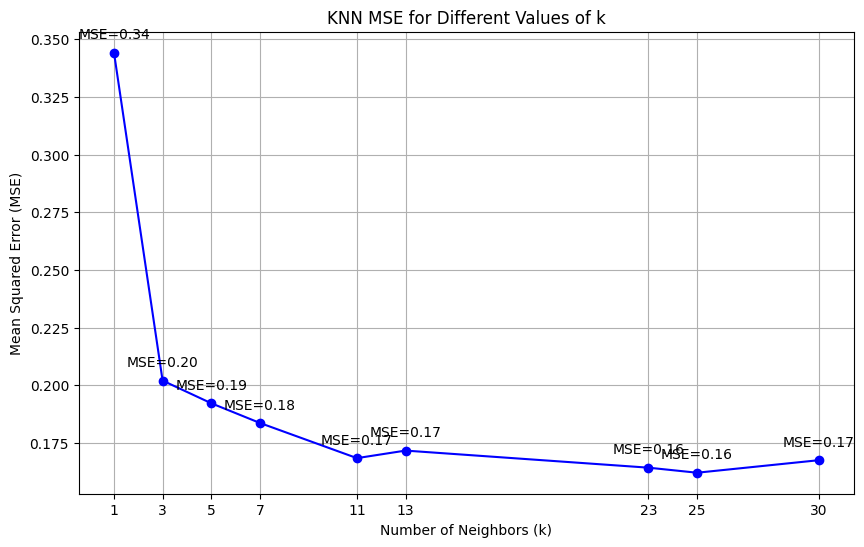

In [26]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Values of k to test
k_values = [1, 3, 5, 7, 11, 13, 23, 25, 30]

# Lists to store MSE values for each k
mse_values = []

# Loop through different values of k
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-', color='b')
plt.title('KNN MSE for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.xticks(k_values)

# Annotate the points with MSE values
for i, mse in enumerate(mse_values):
    plt.annotate(f'MSE={mse:.2f}', (k_values[i], mse_values[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()


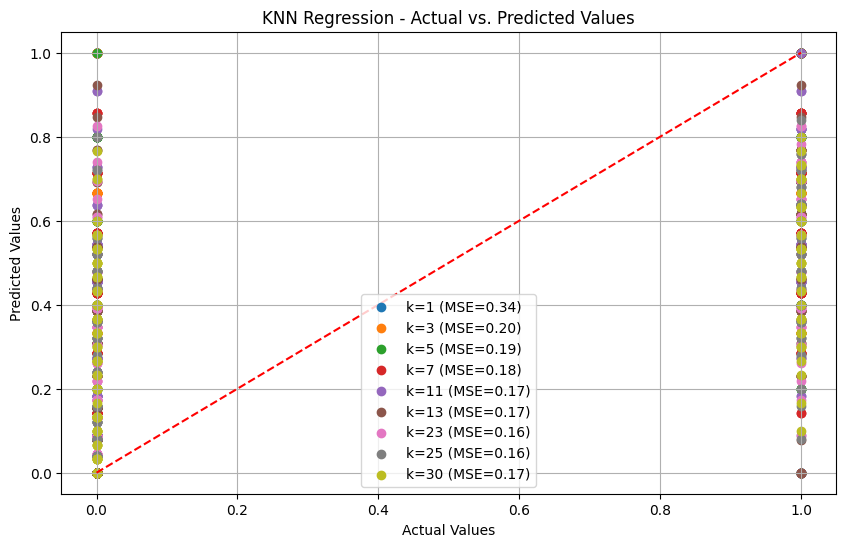

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Values of k to test
k_values = [1, 3, 5, 7, 11, 13, 23, 25, 30]

# Lists to store MSE values for each k
mse_values = []

# Lists to store predicted values for each k
y_pred_values = []

# Loop through different values of k
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    y_pred_values.append(y_pred)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.title('KNN Regression - Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

for i, k in enumerate(k_values):
    plt.scatter(y_test, y_pred_values[i], label=f'k={k} (MSE={mse_values[i]:.2f})')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 812.7 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.4 MB 1.7 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.4 MB 3.4 MB/s eta 0:00:01
   ----------------------- ---------------- 0.9/1.4 MB 3.9 MB/s eta 0:00:01
   ------------------------------- -------- 1.1/1.4 MB 4.2 MB/s eta 0:00:01
   -------------------------------------- - 1.4/1.4 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 4.0 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Generate an example dataset (You should replace this with your own data)
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features
y = iris.target

# Values of k to test
k_values = [1, 3, 5, 7, 11, 13, 23, 25, 30]

# Create subplots to display the decision boundaries for different k values
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, k in enumerate(k_values):
    row = i // 3
    col = i % 3

    # Create and fit the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    # Plot the decision regions
    ax = axes[row, col]
    plot_decision_regions(X, y, clf=knn, ax=ax, legend=2)
    ax.set_title(f'k={k}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()
